<a href="https://colab.research.google.com/github/Dyinastie/PVCK_3D_Dyinastie/blob/main/PCVK_Jobsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# **1. Gamma Correction**

Gamma Correction pada citra
--------------------------------
Masukan Nilai Gamma : 3


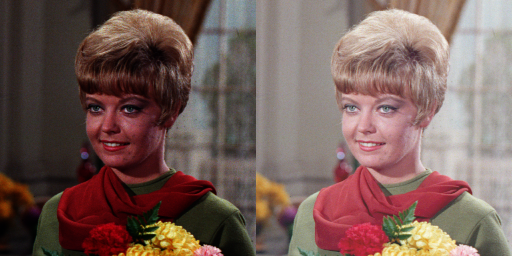

In [ ]:
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  nilaiGamma = int(input('Masukan Nilai Gamma : '))
except ValueError:
  print('Error, not a number')

# Fungsi untuk menerapkan gamma correction
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    # Membangun lookup table untuk setiap nilai intensitas pixel (0-255)
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Menerapkan koreksi gamma menggunakan lookup table
    return cv.LUT(img, table)

img = cv.imread('/content/drive/MyDrive/Images/Female.tiff')

# Terapkan gamma correction
gamma_img = gamma_correction(img, nilaiGamma)

final_frame = cv.hconcat((img, gamma_img))
cv2_imshow(final_frame)

# **2. Image Depth**

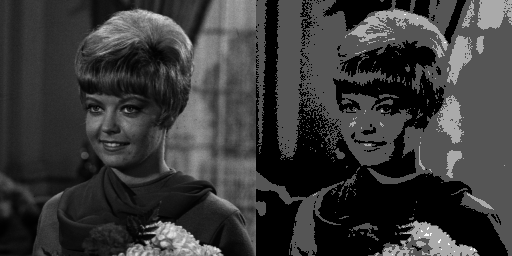

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Images/Female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

# **3. Average Denoising**

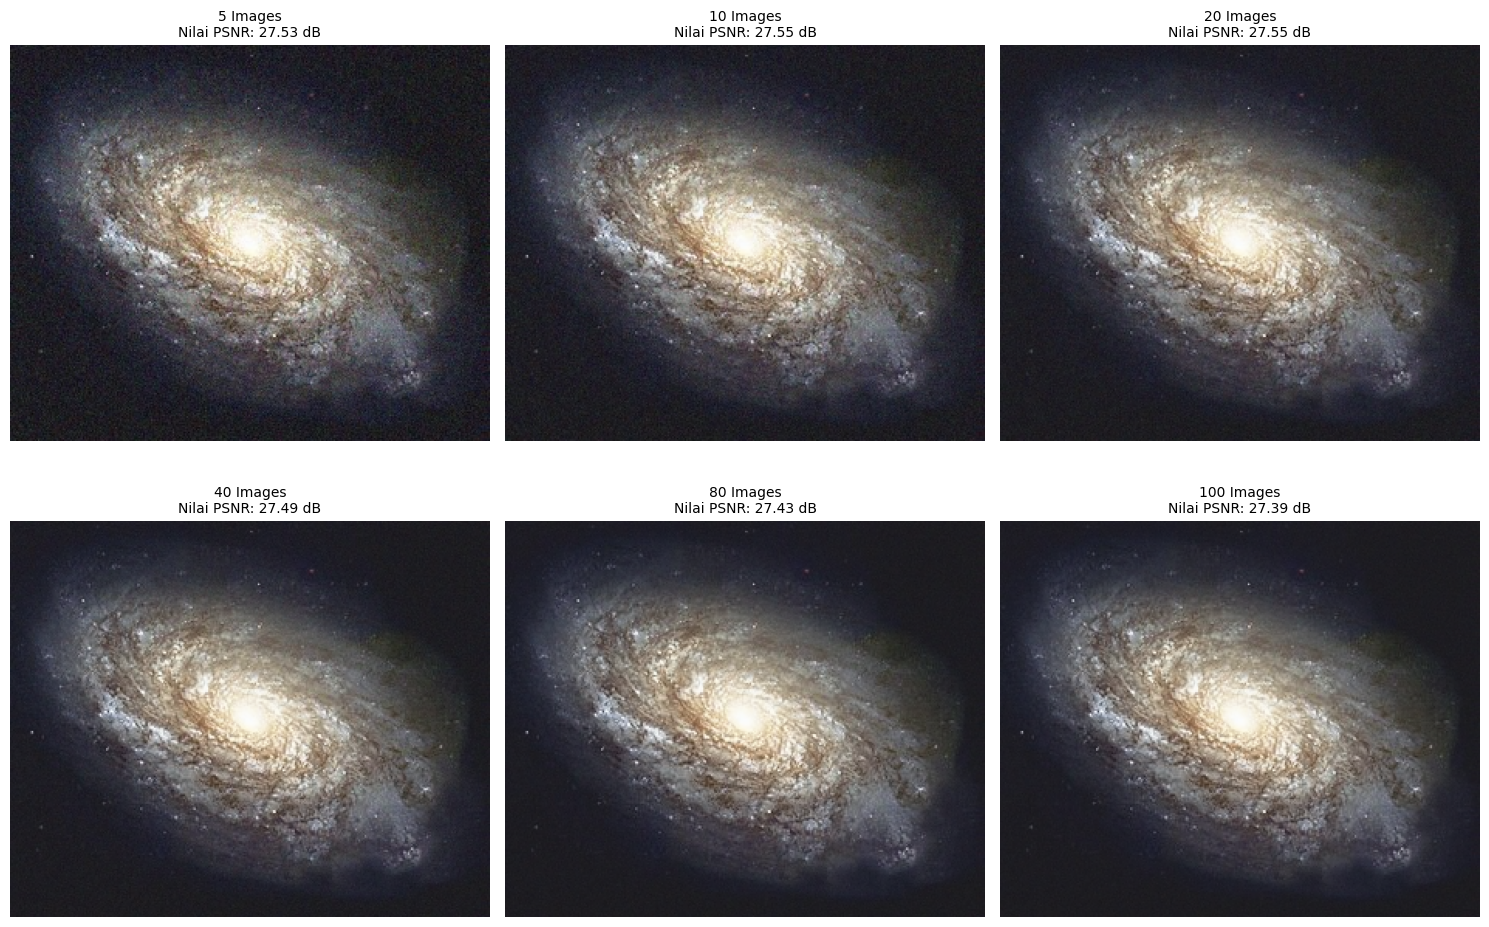

In [ ]:
import glob
from math import log10, sqrt

# Memuat gambar asli
original = cv.imread('/content/drive/MyDrive/Images/Galaxy.jpg')

# Memuat semua image denoising
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Cek jika tidak ada gambar yang dimuat
if not cv_img:
    print("No images found in the specified directory.")
    raise SystemExit  # Exit or handle accordingly

# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Parameter jumlah gambar yang digunakan untuk denoising
test_images_counts = [5, 10, 20, 40, 80, 100]

# Membuat subplot untuk menampilkan hasil
rows = 2
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Menghitung Average dan PNSR
for index, num_images in enumerate(test_images_counts):

    # Inisialisasi gambar rata-rata
    average_img = np.zeros(cv_img[0].shape, np.float32)

    # Proses rata-rata dari gambar yang tersedia
    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv.convertScaleAbs(denoised_img)

    # Menghitung PSNR antara gambar asli dan gambar hasil denoising
    psnr_value = PSNR(original, denoised_img)

    # Menampilkan hasil
    row = index // cols
    col = index % cols
    axs[row, col].imshow(cv.cvtColor(denoised_img, cv.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nNilai PSNR: {psnr_value:.2f} dB', fontsize=10)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

**Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah?**

Kualitas gambar meningkat seiring dengan bertambahnya jumlah citra yang di-average. Hal ini terlihat dari nilai PSNR yang terus meningkat. Semakin tinggi nilai PSNR, artinya semakin rendah noise yang ada pada citra hasil averaging dibandingkan dengan citra asli.
Pada titik tertentu, kenaikan nilai PSNR mungkin menjadi lebih lambat atau stabil, menunjukkan bahwa penambahan citra tambahan mungkin tidak memberikan peningkatan kualitas yang signifikan.

# **4. Image Masking**

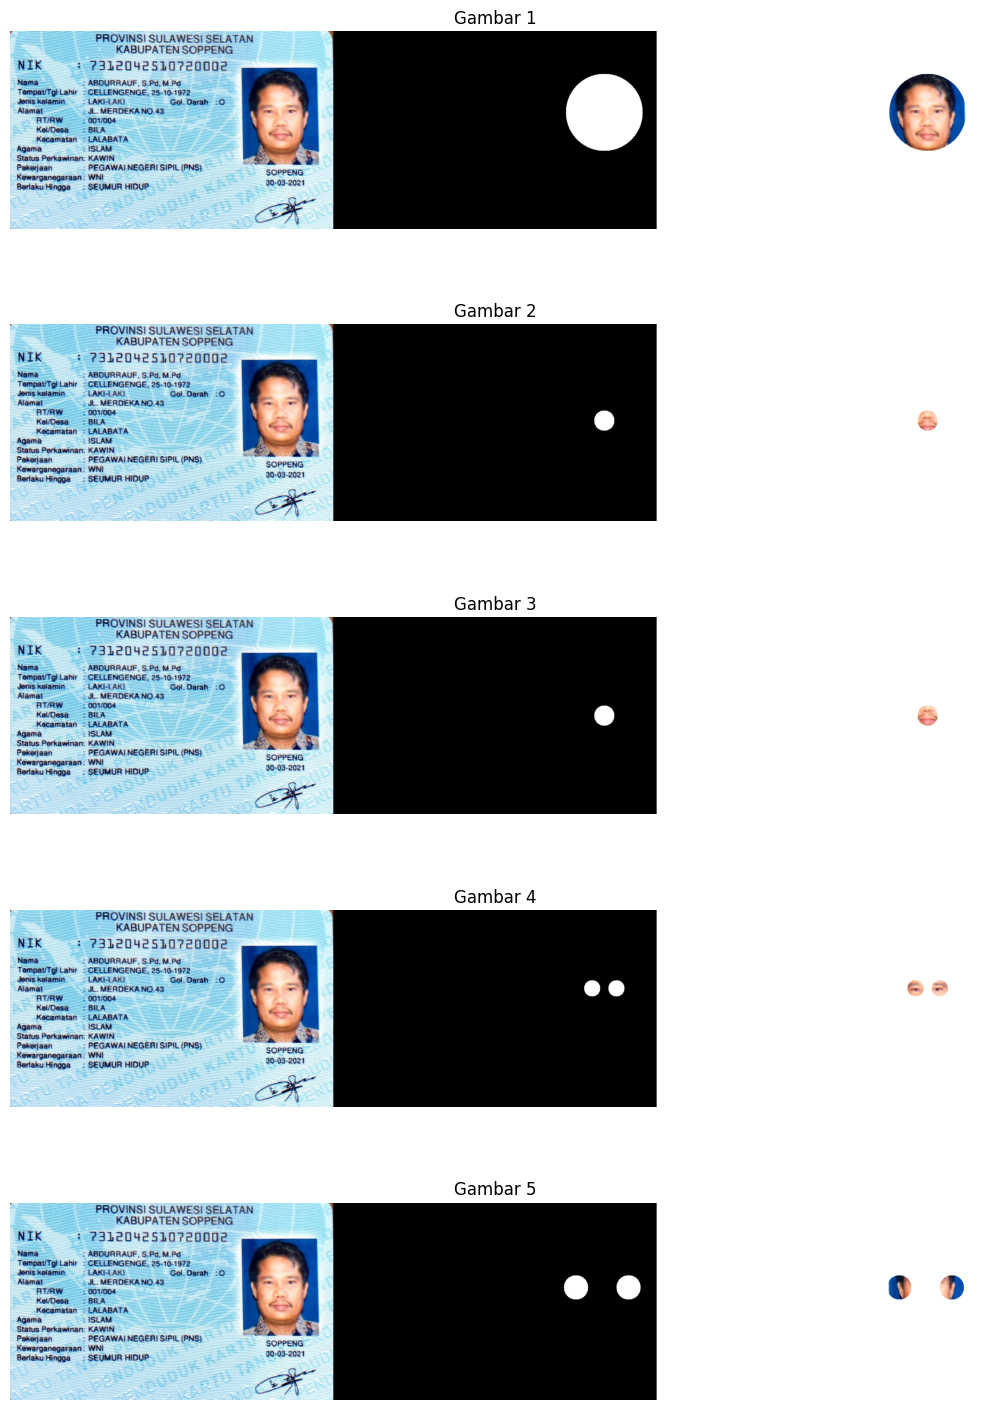

In [ ]:
# Membaca KTP
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP2.jpeg')

# Periksa apakah gambar berhasil dibaca
if img_ktp is None:
    raise ValueError("Gambar tidak ditemukan atau path salah.")

# Daftar koordinat dan radius lingkaran untuk masing-masing mask
circle_params = [
    ((670, 200), 95),
    ((670, 240), 25),
    ((670, 245), 25),
    ((700, 195), 20),
    ((640, 195), 20),
    ((600, 210), 30),
    ((730, 210), 30)
]

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
masks = [np.zeros(img_ktp.shape[:2], dtype=np.uint8) for _ in range(5)]  # Hanya 2D untuk grayscale

# Membuat lingkaran pada masing-masing mask sesuai dengan parameter
masks[0] = cv.circle(masks[0], circle_params[0][0], circle_params[0][1], 255, -1)
masks[1] = cv.circle(masks[1], circle_params[1][0], circle_params[1][1], 255, -1)
masks[2] = cv.circle(masks[2], circle_params[2][0], circle_params[2][1], 255, -1)
masks[3] = cv.circle(masks[3], circle_params[3][0], circle_params[3][1], 255, -1)
masks[3] = cv.circle(masks[3], circle_params[4][0], circle_params[4][1], 255, -1)
masks[4] = cv.circle(masks[4], circle_params[5][0], circle_params[5][1], 255, -1)
masks[4] = cv.circle(masks[4], circle_params[6][0], circle_params[6][1], 255, -1)

# Membuat background putih dengan ukuran yang sama dengan gambar asli
white_background = np.ones_like(img_ktp) * 255

# Menggabungkan hasil mask dengan latar belakang putih
results_with_background = []
for mask in masks:
    # Hasil dari mask (pastikan mask adalah grayscale)
    masked_result = cv.bitwise_and(img_ktp, img_ktp, mask=mask)
    # Menggabungkan dengan background putih
    result_with_bg = np.where(mask[:, :, None] == 0, white_background, masked_result)  # Mengganti area mask dengan putih
    results_with_background.append(result_with_bg)

# Menggabungkan semua gambar (asli, mask, dan hasil) ke dalam satu frame
final_frames = [cv.hconcat([img_ktp, cv.cvtColor(mask, cv.COLOR_GRAY2BGR), result]) for mask, result in zip(masks, results_with_background)]

# Menampilkan hasil dengan title secara vertikal
plt.figure(figsize=(10, 15))

titles = ["Gambar 1", "Gambar 2", "Gambar 3",
          "Gambar 4", "Gambar 5"]

# Menampilkan semua gambar menggunakan perulangan
for i, frame in enumerate(final_frames):
    plt.subplot(5, 1, i + 1)
    plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# **5. Analisa Operator**

(752, 736, 3)


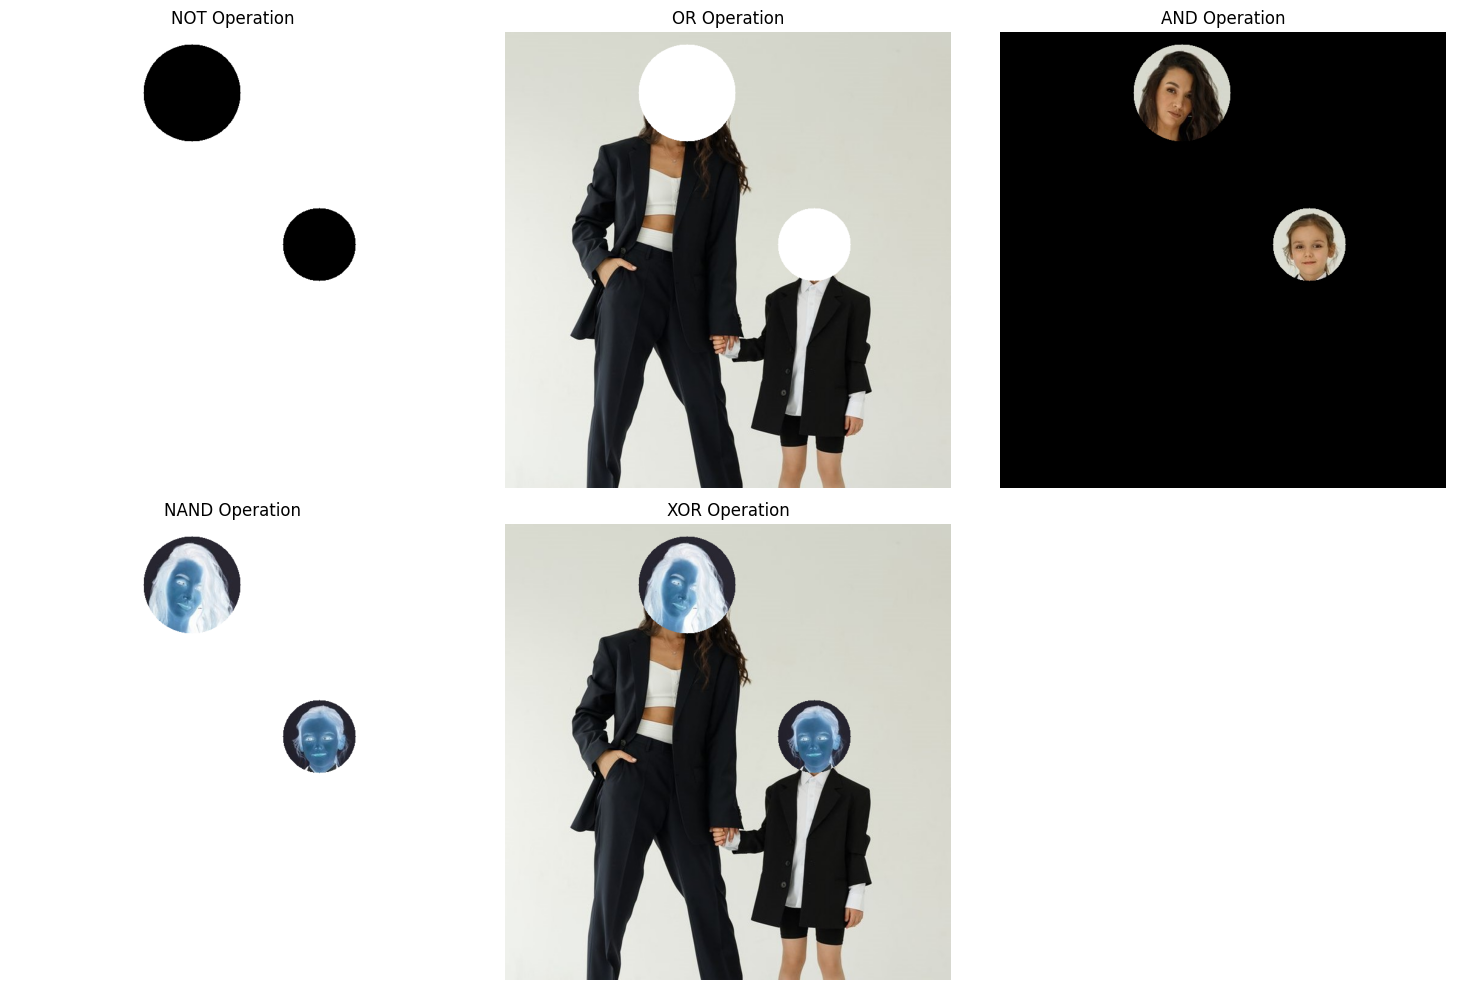

In [ ]:
# Membaca gambar asli
img_masking = cv.imread('/content/drive/MyDrive/Images/Couple.jpg')
print(img_masking.shape)

# Membuat mask kosong dengan ukuran yang sama dengan gambar asli
mask1 = np.zeros(img_masking.shape, dtype=np.uint8)

# Membuat lingkaran pertama dan kedua dengan warna putih
mask = cv.circle(mask1, (300, 100), 80, (255, 255, 255), -1)  # Lingkaran pertama
mask = cv.circle(mask1, (510, 350), 60, (255, 255, 255), -1)  # Lingkaran kedua

# Menggunakan beberapa operasi bitwise
result_not = cv.bitwise_not(mask)               # Operasi NOT
result_or = cv.bitwise_or(img_masking, mask)    # Operasi OR
result_and = cv.bitwise_and(img_masking, mask)  # Operasi AND

# Membuat operasi NAND secara manual (invert hasil AND)
result_nand = cv.bitwise_not(result_and)

# Menggunakan operasi XOR
result_xor = cv.bitwise_xor(img_masking, mask)  # Operasi XOR

# Menampilkan hasil dengan urutan yang diinginkan
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan hasil operasi NOT
axs[0, 0].imshow(cv.cvtColor(result_not, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('NOT Operation')
axs[0, 0].axis('off')

# Menampilkan hasil operasi OR
axs[0, 1].imshow(cv.cvtColor(result_or, cv.COLOR_BGR2RGB))
axs[0, 1].set_title('OR Operation')
axs[0, 1].axis('off')

# Menampilkan hasil operasi AND
axs[0, 2].imshow(cv.cvtColor(result_and, cv.COLOR_BGR2RGB))
axs[0, 2].set_title('AND Operation')
axs[0, 2].axis('off')

# Menampilkan hasil operasi NAND
axs[1, 0].imshow(cv.cvtColor(result_nand, cv.COLOR_BGR2RGB))
axs[1, 0].set_title('NAND Operation')
axs[1, 0].axis('off')

# Menampilkan hasil operasi XOR
axs[1, 1].imshow(cv.cvtColor(result_xor, cv.COLOR_BGR2RGB))
axs[1, 1].set_title('XOR Operation')
axs[1, 1].axis('off')

# Matikan axis untuk gambar yang tidak terpakai
axs[1, 2].axis('off')

# Tampilkan keseluruhan plot dengan judul
plt.tight_layout()
plt.show()

**Tuliskan hasil analisa anda:**

> **NOT**: Membalikkan seluruh gambar, membuat area terang menjadi gelap dan sebaliknya.

> **OR**: Menggabungkan gambar dan mask dengan mempertahankan area putih dari mask, sehingga area ini muncul di gambar.

> **AND**: Menyisakan hanya area yang terdapat pada kedua gambar (input dan mask), membuat area lain menjadi hitam.

> **NAND**: Membalik hasil AND, membuat area di luar lingkaran muncul dan yang di dalam menjadi hitam.

> **XOR**: Menghasilkan efek kontras dengan memunculkan area yang berbeda antara gambar dan mask.